# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame 
# Changed the order around to match the disply on the starter code 
combined_data = pd.merge(study_results, mouse_metadata, on="Mouse ID")

# Display the data table for preview
combined_data.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22


In [4]:
# Checking the number of mice.
num_mice = len(combined_data["Mouse ID"].unique())
print("The number of mice in the dataset is:", num_mice)


The number of mice in the dataset is: 249


In [5]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_mice = combined_data[combined_data.duplicated(subset=["Mouse ID", "Timepoint"], keep=False)]

# Extracting the Mouse IDs with duplicates
duplicate_mouse_ids = duplicate_mice["Mouse ID"].unique()

# Displaying the duplicate Mouse IDs
print("Duplicate mice by ID number:")
print(duplicate_mouse_ids)


Duplicate mice by ID number:
['g989']


In [6]:
# Optional: Get all the data for the duplicate mouse ID. 

duplicate_mice = combined_data[combined_data.duplicated(subset=["Mouse ID", "Timepoint"], keep=False)]

# Extracting the Mouse IDs with duplicates
duplicate_mouse_ids = duplicate_mice["Mouse ID"].unique()

# Get all the data for the duplicate mouse IDs
duplicate_mouse_data = combined_data[combined_data["Mouse ID"].isin(duplicate_mouse_ids)]

# Displaying the data for the duplicate mouse IDs
print("Data for the duplicate mouse IDs:")
duplicate_mouse_data.head(15)


Data for the duplicate mouse IDs:


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
860,g989,0,45.000000,0,Propriva,Female,21,26
861,g989,0,45.000000,0,Propriva,Female,21,26
862,g989,5,48.786801,0,Propriva,Female,21,26
863,g989,5,47.570392,0,Propriva,Female,21,26
864,g989,10,51.745156,0,Propriva,Female,21,26
865,g989,10,49.880528,0,Propriva,Female,21,26
866,g989,15,51.325852,1,Propriva,Female,21,26
867,g989,15,53.442020,0,Propriva,Female,21,26
868,g989,20,55.326122,1,Propriva,Female,21,26
869,g989,20,54.657650,1,Propriva,Female,21,26


In [7]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.

cleaned_data = combined_data.drop_duplicates(subset="Mouse ID", keep="first")

# Display the clean DataFrame
print("Clean DataFrame after dropping duplicate mice by ID:")
cleaned_data.head()


Clean DataFrame after dropping duplicate mice by ID:


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
10,f932,0,45.0,0,Ketapril,Male,15,29
11,g107,0,45.0,0,Ketapril,Female,2,29
19,a457,0,45.0,0,Ketapril,Female,11,30
22,c819,0,45.0,0,Ketapril,Male,21,25


In [8]:
# Checking the number of mice in the clean DataFrame.

# Removing the 'g989' mouse ID from the clean DataFrame
cleaned_data = cleaned_data[cleaned_data['Mouse ID'] != 'g989']

# Checking the number of mice in the clean DataFrame after removing the 'g989' mouse
num_mice_cleaned = len(cleaned_data["Mouse ID"].unique())
print("The number of mice in the clean DataFrame is:", num_mice_cleaned)



The number of mice in the clean DataFrame is: 248


## Summary Statistics

In [9]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.

# Group by drug regimen and calculate the required summary statistics
summary_stats = combined_data.groupby('Drug Regimen')['Tumor Volume (mm3)'].agg(['mean', 'median', 'var', 'std', 'sem'])

# Rename the columns for clarity
summary_stats.rename(columns={
    'mean': 'Mean Tumor Volume',
    'median': 'Median Tumor Volume',
    'var': 'Tumor Volume Variance',
    'std': 'Tumor Volume Std. Dev.',
    'sem': 'Tumor Volume SEM'
}, inplace=True)

# Display the summary statistics DataFrame
print("Summary Statistics of Tumor Volume for Each Drug Regimen:")
summary_stats.head(10)


Summary Statistics of Tumor Volume for Each Drug Regimen:


,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [10]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line

# Generate the summary statistics table in a single line


summary_stats_single_line = combined_data.groupby('Drug Regimen')['Tumor Volume (mm3)'].agg(
    mean ='mean',
    median ='median',
    var ='var',
    std ='std',
    sem='sem'
)

# Display the summary statistics DataFrame
print("Summary Statistics of Tumor Volume for Each Drug Regimen (Single Line):")
summary_stats_single_line.head(10)

Summary Statistics of Tumor Volume for Each Drug Regimen (Single Line):


,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

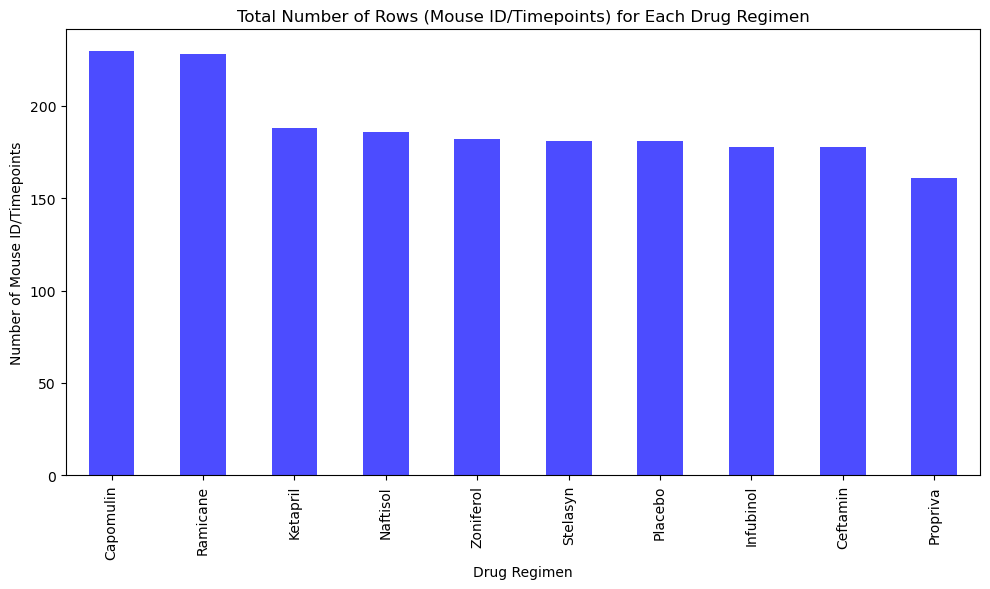

In [11]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
# Count the occurrences of each drug regimen
drug_regimen_counts = combined_data['Drug Regimen'].value_counts()

# Create a bar plot using Pandas
drug_regimen_counts.plot(kind='bar', color='blue', alpha=0.7, figsize=(10, 6))

# Add plot labels and title using Pandas
plt.xlabel('Drug Regimen')
plt.ylabel('Number of Mouse ID/Timepoints')
plt.title('Total Number of Rows (Mouse ID/Timepoints) for Each Drug Regimen')

# Display the plot
plt.tight_layout()
plt.show()


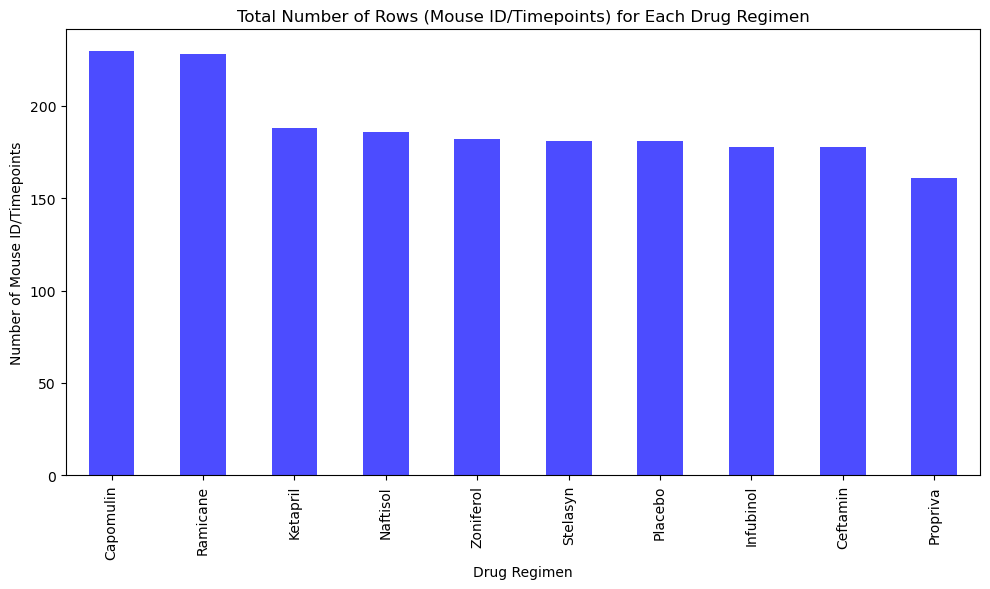

In [12]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.

# Count the occurrences of each drug regimen
drug_regimen_counts = combined_data['Drug Regimen'].value_counts()

# Create a bar plot using Pandas
drug_regimen_counts.plot(kind='bar', color='blue', alpha=0.7, figsize=(10, 6))

# Add plot labels and title using Pandas
plt.xlabel('Drug Regimen')
plt.ylabel('Number of Mouse ID/Timepoints')
plt.title('Total Number of Rows (Mouse ID/Timepoints) for Each Drug Regimen')

# Display the plot
plt.tight_layout()
plt.show()


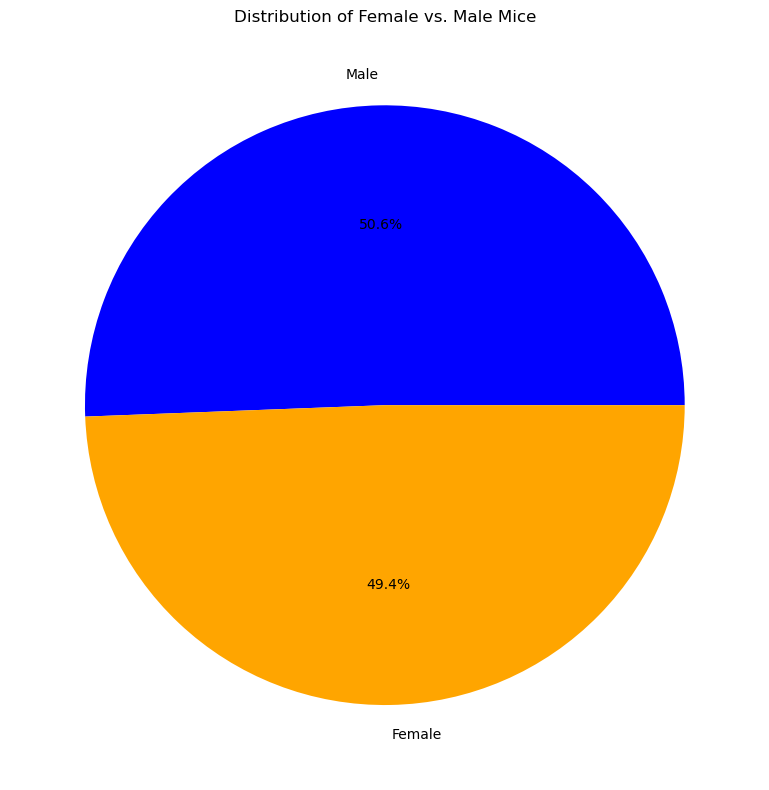

In [16]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas

# Count the occurrences of each sex (female and male)
sex_distribution = combined_data['Sex'].value_counts()

# Create a pie plot using Pandas
sex_distribution.plot(kind='pie', colors=['blue', 'orange'], autopct='%1.1f%%', figsize=(8, 8))

# Add plot title
plt.title('Distribution of Female vs. Male Mice')

# Remove y-axis label (percentage labels are self-explanatory)
plt.ylabel('')

# Display the plot
plt.tight_layout()
plt.show()


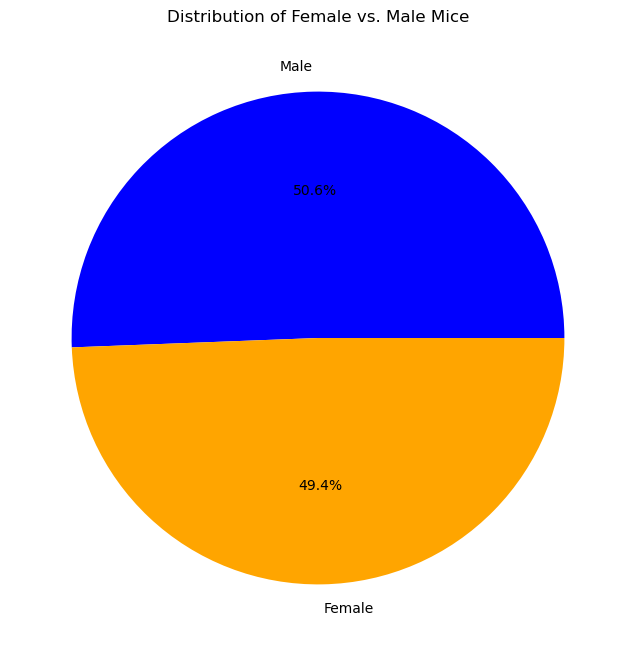

In [18]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
import matplotlib.pyplot as plt

# Count the occurrences of each sex (female and male)
sex_distribution = combined_data['Sex'].value_counts()

# Create a pie plot using pyplot
plt.figure(figsize=(8, 8))
plt.pie(sex_distribution, labels=sex_distribution.index, colors=['blue', 'orange'], autopct='%1.1f%%')

# Add plot title
plt.title('Distribution of Female vs. Male Mice')

# Display the plot
plt.show()


## Quartiles, Outliers and Boxplots

In [19]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint

# List of the four treatment regimens
selected_treatments = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Get the last (greatest) timepoint for each mouse in the selected treatments
max_timepoints = combined_data.loc[combined_data["Drug Regimen"].isin(selected_treatments)]\
    .groupby("Mouse ID")["Timepoint"].max()

# Merge the group DataFrame with the original DataFrame to get the tumor volume at the last timepoint
final_tumor_volume = pd.merge(max_timepoints, combined_data, on=["Mouse ID", "Timepoint"], how="left")

# Display the final DataFrame with tumor volume at the last timepoint for the selected treatments
print("Final tumor volume for each mouse across the selected treatments:")
final_tumor_volume.head(15)


Final tumor volume for each mouse across the selected treatments:


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,a203,45,67.973419,2,Infubinol,Female,20,23
1,a251,45,65.525743,1,Infubinol,Female,21,25
2,a275,45,62.999356,3,Ceftamin,Female,20,28
3,a411,45,38.407618,1,Ramicane,Male,3,22
4,a444,45,43.047543,0,Ramicane,Female,10,25
5,a520,45,38.810366,1,Ramicane,Male,13,21
6,a577,30,57.031862,2,Infubinol,Female,6,25
7,a644,45,32.978522,1,Ramicane,Female,7,17
8,a685,45,66.083066,3,Infubinol,Male,8,30
9,b128,45,38.982878,2,Capomulin,Female,9,22


In [20]:

# List of the four treatment regimens
selected_treatments = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol_data = []

# Calculate the IQR and determine if there are any potential outliers
for treatment in selected_treatments:
    # Locate the rows which contain mice on each drug and get the tumor volumes
    treatment_data = final_tumor_volume.loc[final_tumor_volume["Drug Regimen"] == treatment, "Tumor Volume (mm3)"]
    
    # Add subset to tumor_vol_data list
    tumor_vol_data.append(treatment_data)
    
    # Calculate and print the IQR for the current treatment
    quartiles = treatment_data.quantile([0.25, 0.75])
    lower_quartile = quartiles[0.25]
    upper_quartile = quartiles[0.75]
    iqr = upper_quartile - lower_quartile
    lower_bound = lower_quartile - 1.5 * iqr
    upper_bound = upper_quartile + 1.5 * iqr
    
    print(f"{treatment} IQR: {iqr}")
    print(f"{treatment} Potential Outliers: {treatment_data.loc[(treatment_data < lower_bound) | (treatment_data > upper_bound)]}\n")


Capomulin IQR: 7.781863460000004
Capomulin Potential Outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)

Ramicane IQR: 9.098536719999998
Ramicane Potential Outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)

Infubinol IQR: 11.477135160000003
Infubinol Potential Outliers: 15    36.321346
Name: Tumor Volume (mm3), dtype: float64

Ceftamin IQR: 15.577752179999997
Ceftamin Potential Outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)



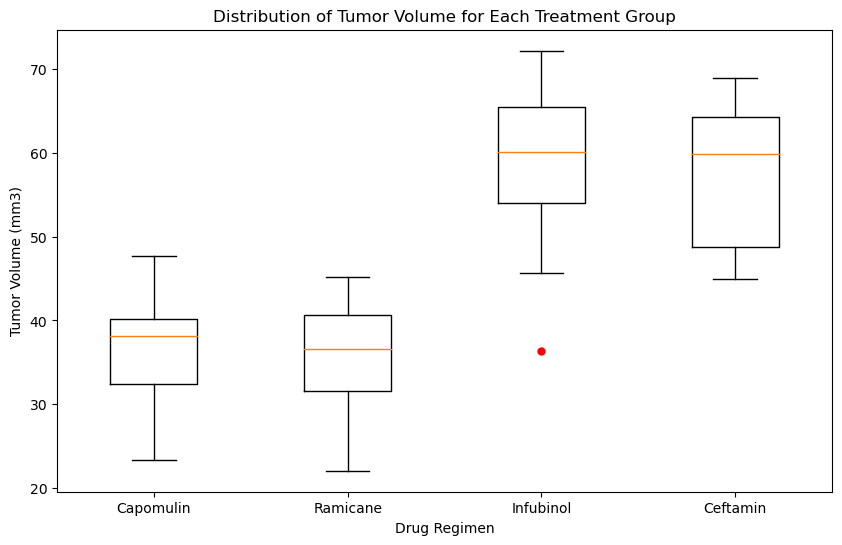

In [21]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.

# List of the four treatment regimens
selected_treatments = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol_data = []

# Calculate the IQR and determine if there are any potential outliers
for treatment in selected_treatments:
    treatment_data = final_tumor_volume.loc[final_tumor_volume["Drug Regimen"] == treatment, "Tumor Volume (mm3)"]
    tumor_vol_data.append(treatment_data)

# Create a box plot to show the distribution of tumor volume for each treatment group
plt.figure(figsize=(10, 6))
plt.boxplot(tumor_vol_data, labels=selected_treatments, flierprops=dict(marker='o', markersize=5, markerfacecolor='red', markeredgecolor='red'))

# Add plot labels and title
plt.xlabel('Drug Regimen')
plt.ylabel('Tumor Volume (mm3)')
plt.title('Distribution of Tumor Volume for Each Treatment Group')

# Display the plot
plt.show()


## Line and Scatter Plots

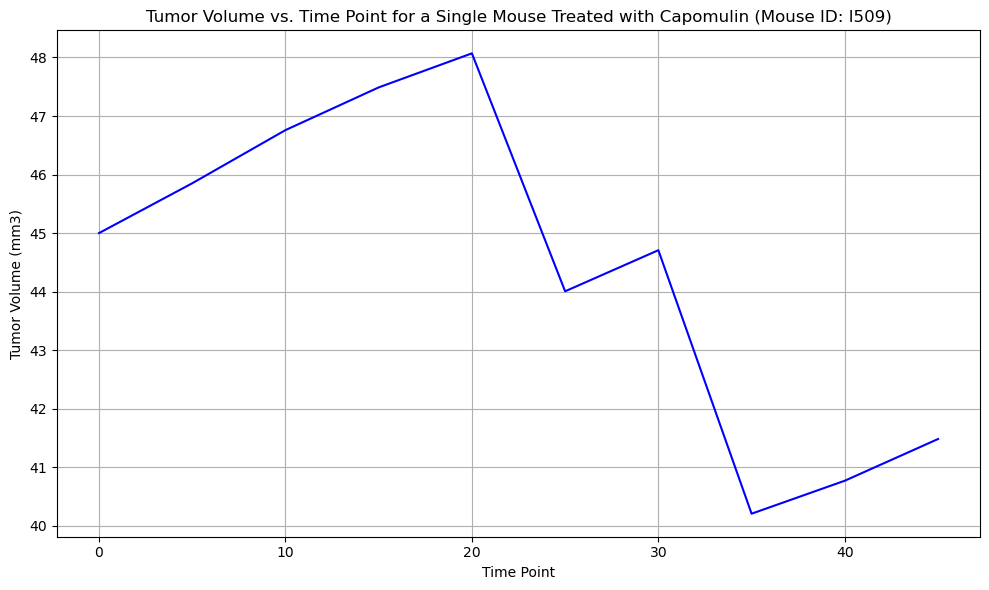

In [22]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin

# Select the data for a single mouse treated with Capomulin
single_mouse_data = combined_data.loc[(combined_data["Drug Regimen"] == "Capomulin") & (combined_data["Mouse ID"] == "l509")]

# Create a line plot for tumor volume vs. time point
plt.figure(figsize=(10, 6))
plt.plot(single_mouse_data["Timepoint"], single_mouse_data["Tumor Volume (mm3)"], color='b')

# Add plot labels and title
plt.xlabel('Time Point')
plt.ylabel('Tumor Volume (mm3)')
plt.title('Tumor Volume vs. Time Point for a Single Mouse Treated with Capomulin (Mouse ID: l509)')

# Display the plot
plt.grid(True)
plt.tight_layout()
plt.show()




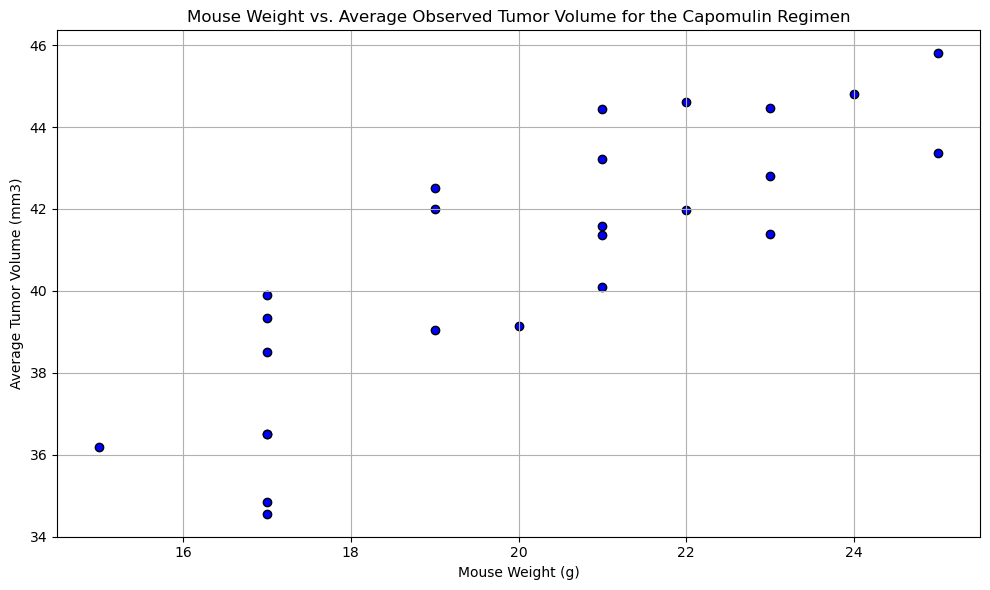

In [23]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen

# Select the data for the Capomulin regimen
capomulin_data = combined_data.loc[combined_data["Drug Regimen"] == "Capomulin"]

# Calculate the average observed tumor volume for each mouse in the Capomulin regimen
average_tumor_volume = capomulin_data.groupby("Mouse ID")["Tumor Volume (mm3)"].mean()
mouse_weights = capomulin_data.groupby("Mouse ID")["Weight (g)"].mean()

# Create a scatter plot for mouse weight vs. average observed tumor volume
plt.figure(figsize=(10, 6))
plt.scatter(mouse_weights, average_tumor_volume, color='b', edgecolors='black')

# Add plot labels and title
plt.xlabel('Mouse Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.title('Mouse Weight vs. Average Observed Tumor Volume for the Capomulin Regimen')

# Display the plot
plt.grid(True)
plt.tight_layout()
plt.show()



## Correlation and Regression

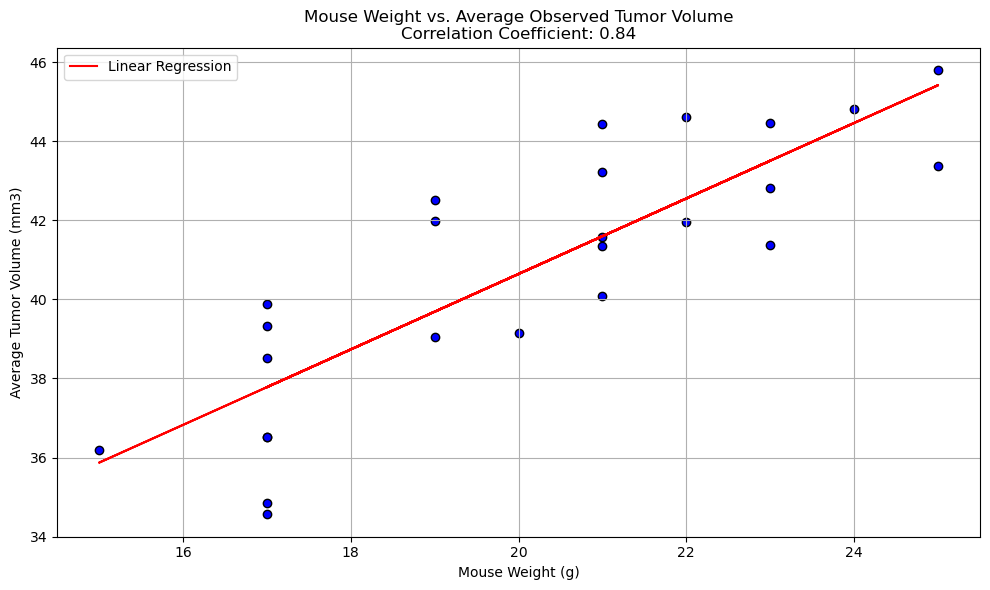

In [25]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen

# Select the data for the Capomulin regimen
capomulin_data = combined_data.loc[combined_data["Drug Regimen"] == "Capomulin"]

# Calculate the average observed tumor volume for each mouse in the Capomulin regimen
average_tumor_volume = capomulin_data.groupby("Mouse ID")["Tumor Volume (mm3)"].mean()
mouse_weights = capomulin_data.groupby("Mouse ID")["Weight (g)"].mean()

# Calculate the correlation coefficient between mouse weight and average observed tumor volume
correlation_coefficient, _ = st.pearsonr(mouse_weights, average_tumor_volume)

# Create a scatter plot for mouse weight vs. average observed tumor volume
plt.figure(figsize=(10, 6))
plt.scatter(mouse_weights, average_tumor_volume, color='b', edgecolors='black')

# Add plot labels and title
plt.xlabel('Mouse Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.title(f'Mouse Weight vs. Average Observed Tumor Volume\nCorrelation Coefficient: {correlation_coefficient:.2f}')

# Perform linear regression
slope, intercept, r_value, p_value, std_err = st.linregress(mouse_weights, average_tumor_volume)

# Create the regression line
regression_line = slope * mouse_weights + intercept
plt.plot(mouse_weights, regression_line, color='r', label='Linear Regression')

# Display the plot with legend
plt.legend()

# Display the plot
plt.grid(True)
plt.tight_layout()
plt.show()
